In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from art.estimators.classification import KerasClassifier #No soporta TF 2
from art.utils import load_dataset
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from art.attacks.evasion import SquareAttack, FastGradientMethod
from keras.utils import to_categorical
from art.estimators.classification import TensorFlowV2Classifier
%matplotlib inline

tf.compat.v1.disable_eager_execution()

In [3]:
model1 = tf.keras.models.load_model('lab6')

In [4]:
df = pd.DataFrame(columns=['Family', 'Image'])
fam_cat = {}
for i, family in enumerate(os.listdir('malimg_paper_dataset_imgs')):
    fam_cat[i] = family
    for image in os.listdir(f'malimg_paper_dataset_imgs/{family}'):
        imagen = Image.open(f'malimg_paper_dataset_imgs/{family}/{image}')
        imagen = imagen.resize((64,64))

        new_data = {'Family': [family], 'Name': [image], 'Family_cat': [i], 'Image': [np.array(imagen).tolist()]}
        new_df = pd.DataFrame(new_data)
        df = pd.concat([df, new_df], ignore_index=True)

df.head()

,Family,Image,Name,Family_cat
0,Adialer.C,"[[2, 3, 0, 7, 1, 1, 0, 2, 12, 13, 15, 9, 12, 1...",000bde2e9a94ba41c0c111ffd80647c2.png,0.0
1,Adialer.C,"[[2, 14, 2, 0, 0, 0, 4, 4, 11, 6, 12, 20, 9, 1...",000e30a0819ac7ed931d629ce2ef8948.png,0.0
2,Adialer.C,"[[2, 14, 2, 0, 0, 0, 5, 6, 11, 6, 12, 20, 9, 1...",002f06eff1d222560939be72583d6ae9.png,0.0
3,Adialer.C,"[[2, 3, 0, 6, 1, 0, 0, 2, 13, 13, 15, 9, 12, 1...",0044f0746b812f6b454ce210bc58c572.png,0.0
4,Adialer.C,"[[2, 3, 0, 6, 1, 0, 0, 2, 12, 13, 15, 9, 12, 1...",0046a83d932a3d431eb21a99b46d6af7.png,0.0


In [23]:
X = df['Image'].values
y = df['Family_cat'].values
X = np.array([np.array(xi) for xi in X])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[[  1,   0,   3, ...,   0,   0,   0],
        [ 50,  80,  71, ...,  98,  72,  82],
        [ 43,  57,  47, ...,  51,  45,  42],
        ...,
        [125, 123, 132, ..., 142, 141, 145],
        [115, 120, 112, ..., 112, 124, 110],
        [ 90, 104,  69, ...,  97,  82,  92]],

       [[ 42,  40,  53, ...,  17,  23,  25],
        [ 99,  89,  79, ...,  80,  85,  80],
        [ 81,  81, 146, ..., 113,  90, 156],
        ...,
        [140, 120, 112, ..., 132, 118, 118],
        [118, 123, 112, ..., 134, 132, 136],
        [128, 147, 122, ..., 143, 113, 145]],

       [[ 62,  25,  30, ...,  21,   8,   3],
        [151,  89, 121, ..., 148,  94,  82],
        [174, 143, 126, ..., 151, 126, 103],
        ...,
        [139, 151, 127, ..., 135, 127, 150],
        [114, 132, 129, ..., 107, 136, 149],
        [123, 159, 120, ...,  87, 131, 176]],

       ...,

       [[ 22,  20,  20, ...,  20,  25,  20],
        [101, 102,  98, ..., 117, 104,  98],
        [100, 104,  84, ..., 125, 111, 114

In [24]:
X_train = X_train/255
X_test = X_test/255

In [8]:
classifier = KerasClassifier(
    model=model1,
clip_values= (0.0,1.0))

## Ataque de Evasion

In [9]:
attack_auto =FastGradientMethod(
    estimator=classifier, 
    eps=0.15
    )

In [10]:
X_train.shape

(7471, 64, 64)

In [11]:
X_test.shape

(1868, 64, 64)

In [12]:
from skimage.transform import resize

In [26]:
X_train = resize(X_train, (7471, 64, 64, 3), mode='constant')
X_test = resize(X_test, (1868, 64, 64, 3), mode='constant')

In [14]:
test_images_adv = attack_auto.generate(x=X_test)

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [15]:
categorical_y_entrenamiento = to_categorical(y_train)
categorical_y_test = to_categorical(y_test)

In [16]:
#Evaluar los modelos
score_clean = model1.evaluate(
    x=X_test, 
    y=categorical_y_test
    )

# Con adversarial
score_adv = model1.evaluate(
    x=test_images_adv, 
    y=categorical_y_test
    )

# Comparing test losses
print(f"Clean test set loss: {score_clean[0]:.2f} " 
      f"vs adversarial set test loss: {score_adv[0]:.2f}")

# Comparing test accuracies
print(f"Clean test set accuracy: {score_clean[1]:.5f} " 
      f"vs adversarial test set accuracy: {score_adv[1]:.5f}")

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Clean test set loss: 3.11 vs adversarial set test loss: 3.13
Clean test set accuracy: 0.32066 vs adversarial test set accuracy: 0.31692


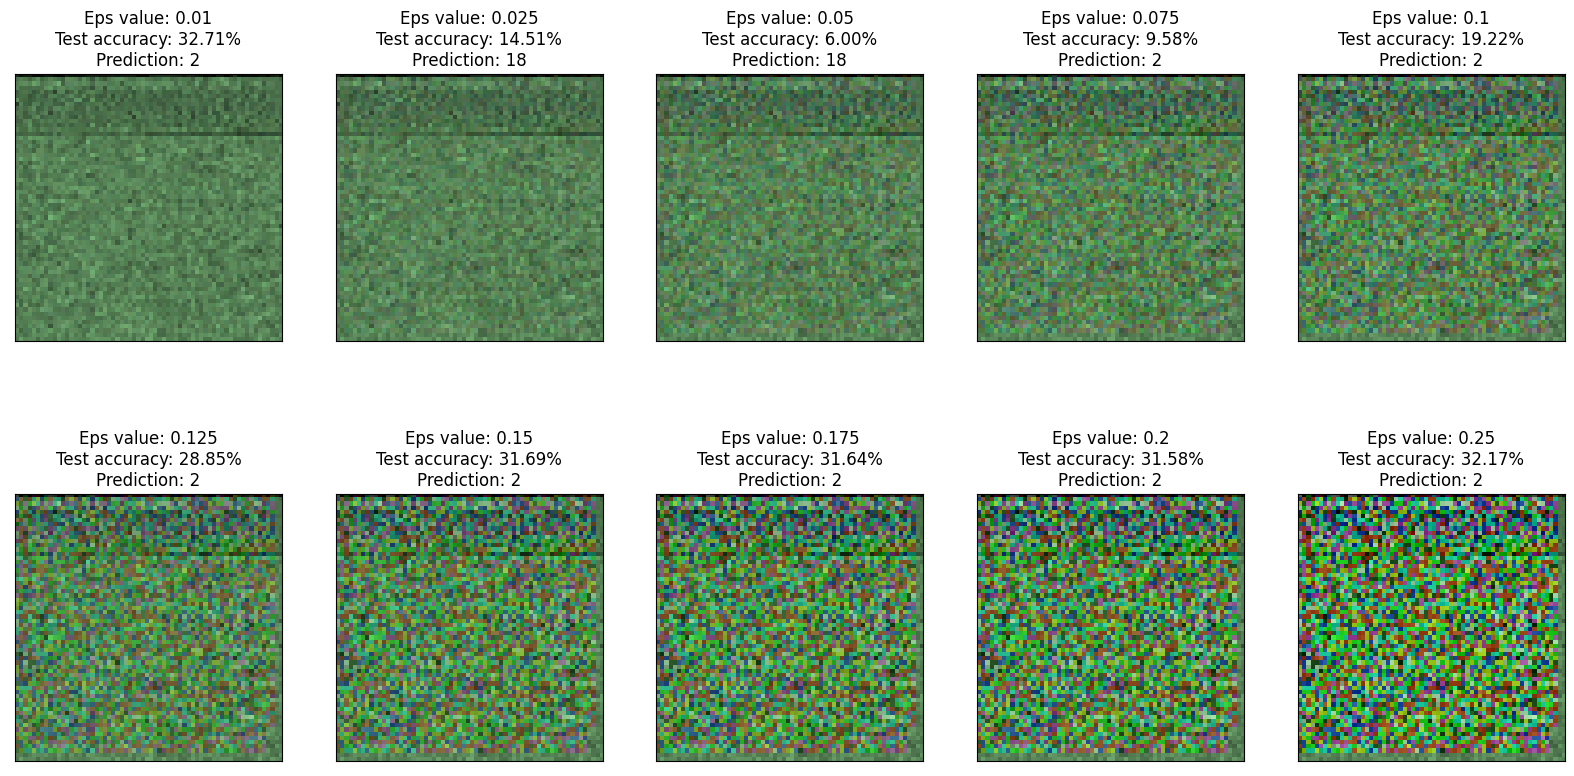

In [17]:
#Se prueba el accuracy para distintos valores de epsilon

# Setting the number of rows and columns for the figure
nrows, ncols = 2, 5

# Generating subplots
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )

# Defining a range of eps values to try
eps_to_try = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]

# Defining a counting variable to traverse eps_to_try
counter = 0

# Iterating over rows and cols
for i in range(nrows):
    for j in range(ncols):    
        # Creating an attack object for the current value of eps    
        attack_fgsm = FastGradientMethod(
            estimator=classifier, 
            eps=eps_to_try[counter]
            )

        # Generating adversarial images
        test_images_adv = attack_fgsm.generate(x=X_test)

        # Showing the first adversarial image
        axes[i, j].imshow(X=test_images_adv[0])

        # Disabling x and y ticks
        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        # Evaluating model performance on adversarial samples and retrieving test accuracy
        test_score = classifier._model.evaluate(
            x=test_images_adv, 
            y=categorical_y_test
            )[1]

        # Getting prediction for the image that we displayed
        prediction = np.argmax(model1.predict(
            x=np.expand_dims(a=test_images_adv[0], 
            axis=0)
            ))    

        # Showing the current eps value, test accuracy, and prediction
        axes[i, j].set_title(
            label=f"Eps value: {eps_to_try[counter]}\n"
            f"Test accuracy: {test_score * 100:.2f}%\n"
            f"Prediction: {prediction}"
            )

        # Incrementing counter
        counter += 1

# Showing the plot
plt.show()

## Ataque adversarial

In [28]:
X = df['Image'].values
y = df['Family_cat'].values
X = np.array([np.array(xi) for xi in X])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[[  1,   0,   3, ...,   0,   0,   0],
        [ 50,  80,  71, ...,  98,  72,  82],
        [ 43,  57,  47, ...,  51,  45,  42],
        ...,
        [125, 123, 132, ..., 142, 141, 145],
        [115, 120, 112, ..., 112, 124, 110],
        [ 90, 104,  69, ...,  97,  82,  92]],

       [[ 42,  40,  53, ...,  17,  23,  25],
        [ 99,  89,  79, ...,  80,  85,  80],
        [ 81,  81, 146, ..., 113,  90, 156],
        ...,
        [140, 120, 112, ..., 132, 118, 118],
        [118, 123, 112, ..., 134, 132, 136],
        [128, 147, 122, ..., 143, 113, 145]],

       [[ 62,  25,  30, ...,  21,   8,   3],
        [151,  89, 121, ..., 148,  94,  82],
        [174, 143, 126, ..., 151, 126, 103],
        ...,
        [139, 151, 127, ..., 135, 127, 150],
        [114, 132, 129, ..., 107, 136, 149],
        [123, 159, 120, ...,  87, 131, 176]],

       ...,

       [[ 22,  20,  20, ...,  20,  25,  20],
        [101, 102,  98, ..., 117, 104,  98],
        [100, 104,  84, ..., 125, 111, 114

In [30]:
img = X_test[0:1]

In [31]:
original_label = np.argmax(y_test[0])
print('Etiqueta original:', original_label)

Etiqueta original: 0


In [34]:
attack = FastGradientMethod(estimator=classifier, eps=0.1)


AttributeError: 'Tensor' object has no attribute 'numpy'